# * 네이버 영화 평점 변화 확인하기

In [6]:
from bs4 import BeautifulSoup
import pandas as pd
from urllib.request import urlopen
from urllib.parse import urljoin

In [21]:
url = "https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20190808"

page = urlopen(url)

soup = BeautifulSoup(page, "html.parser")
print(soup.prettify())

<!DOCTYPE html>
<html lang="ko">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="me2:image">
   <meta content="네이버영화 " property="me2:post_tag">
    <meta content="네이버영화" property="me2:category1"/>
    <meta content="" property="me2:category2"/>
    <meta content="랭킹 : 네이버 영화" property="og:title"/>
    <meta content="영화, 영화인, 예매, 박스오피스 랭킹 정보 제공" property="og:description"/>
    <meta content="article" property="og:type"/>
    <meta content="https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&amp;date=20190808" property="og:url"/>
    <meta content="http://static.naver.net/m/movie/icons/OG_270_270.png" property="og:image"/>
    <!-- http://static.naver.net/m/movie/im/navermovie.jpg -->
    <meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="og:article:thumbnailUrl"/>
    <meta

###### * div 태그의 tit5 클래스만 추출

In [17]:
soup.find_all('div', 'tit5')

[<div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=179518" title="주전장">주전장</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=157243" title="당갈">당갈</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=163788" title="알라딘">알라딘</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=136900" title="어벤져스: 엔드게임">어벤져스: 엔드게임</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=161850" title="아이 캔 스피크">아이 캔 스피크</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=164907" title="레드슈즈">레드슈즈</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=183136" title="뽀로로 극장판 보물섬 대모험">뽀로로 극장판 보물섬 대모험</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=183132" title="교회오빠">교회오빠</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=18781" title="이웃집 토토로">이웃집 토토로</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=187051" title="브링 더 소울 : 더 무비">브링 더 소울 

###### * div 태그의 tit5 클래스의 a 태그에서 문자만 추출

In [30]:
soup.find_all('div', 'tit5')[0].a.string

'주전장'

###### * td 태그의 point 클래스에서 문자만 추출

In [33]:
soup.find_all('td', 'point')[0].string

'9.52'

###### * 5월 1일부터 100일간으로 날짜를 정하고 그 날짜에 해당하는 영화 정보 전체를 찾는다.

In [35]:
date = pd.date_range('2019-5-1', periods=100, freq='D')
date

DatetimeIndex(['2019-05-01', '2019-05-02', '2019-05-03', '2019-05-04',
               '2019-05-05', '2019-05-06', '2019-05-07', '2019-05-08',
               '2019-05-09', '2019-05-10', '2019-05-11', '2019-05-12',
               '2019-05-13', '2019-05-14', '2019-05-15', '2019-05-16',
               '2019-05-17', '2019-05-18', '2019-05-19', '2019-05-20',
               '2019-05-21', '2019-05-22', '2019-05-23', '2019-05-24',
               '2019-05-25', '2019-05-26', '2019-05-27', '2019-05-28',
               '2019-05-29', '2019-05-30', '2019-05-31', '2019-06-01',
               '2019-06-02', '2019-06-03', '2019-06-04', '2019-06-05',
               '2019-06-06', '2019-06-07', '2019-06-08', '2019-06-09',
               '2019-06-10', '2019-06-11', '2019-06-12', '2019-06-13',
               '2019-06-14', '2019-06-15', '2019-06-16', '2019-06-17',
               '2019-06-18', '2019-06-19', '2019-06-20', '2019-06-21',
               '2019-06-22', '2019-06-23', '2019-06-24', '2019-06-25',
      

In [36]:
import urllib
from tqdm import tqdm_notebook

movie_date = []
movie_name = []
movie_point = []

for today in tqdm_notebook(date):
    html = "https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date={date}"
    
    response = urlopen(html.format(date=urllib.parse.quote(today.strftime('%Y%m%d'))))
    # urllib.parse : URL해석, 조작기능을 담은 모듈
    # urllib.parse.quote : 한글 텍스트를 퍼센트 인코딩으로 변환
    # strftime : 시간정보를 문자열로 보여줌.
    
    soup = BeautifulSoup(response, "html.parser")
    
    end = len(soup.find_all('td', 'point'))
    
    movie_date.extend([today for n in range(0, end)])
    movie_name.extend([soup.find_all('div', 'tit5')[n].a.string for n in range(0, end)])
    movie_point.extend([soup.find_all('td', 'point')[n].string for n in range(0, end)])

In [52]:
movie = pd.DataFrame({'date':movie_date, 'name':movie_name, 'point':movie_point})

movie.head()

,date,name,point
0,2019-05-01,그린 북,9.62
1,2019-05-01,가버나움,9.60
2,2019-05-01,베일리 어게인,9.54
3,2019-05-01,어벤져스: 엔드게임,9.44
4,2019-05-01,폴란드로 간 아이들,9.33


In [55]:
# point를 float형식으로 변경해준다
movie['point'] = movie['point'].astype(float)

In [56]:
import numpy as np

movie_unique = pd.pivot_table(movie, index=['name'], aggfunc=np.sum)
movie_best = movie_unique.sort_values(by='point', ascending=False)
movie_best.head()

,point
name,
어벤져스: 엔드게임,939.36
뽀로로 극장판 보물섬 대모험,789.63
교회오빠,757.86
알라딘,737.58
라라랜드,652.84


###### * 특정 영화만 추려서 확인이 가능하다. 이것으로 날짜별 평점의 변화를 확인할 수 있다.

In [62]:
tmp = movie.query('name == ["교회오빠"]')
tmp

,date,name,point
902,2019-05-20,교회오빠,9.69
940,2019-05-21,교회오빠,9.64
979,2019-05-22,교회오빠,9.61
1019,2019-05-23,교회오빠,9.57
1060,2019-05-24,교회오빠,9.58
1100,2019-05-25,교회오빠,9.47
1140,2019-05-26,교회오빠,9.51
1178,2019-05-27,교회오빠,9.52
1220,2019-05-28,교회오빠,9.50
1261,2019-05-29,교회오빠,9.50


###### * 날짜별 평점만 그래프로 표현

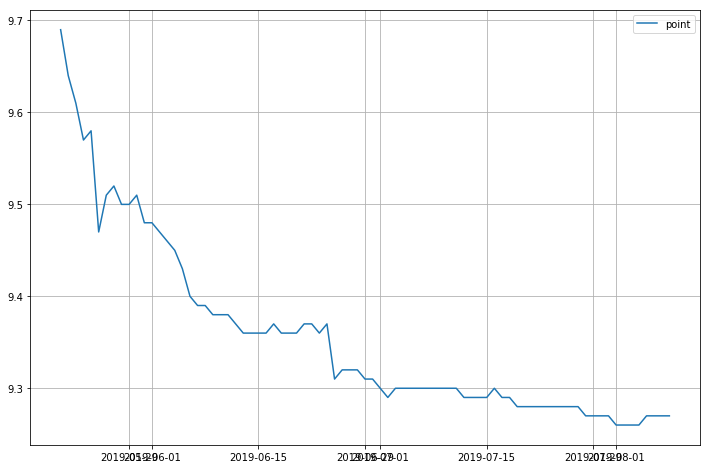

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))
plt.plot(tmp['date'], tmp['point'])
plt.legend(loc='best')
plt.grid()
plt.show()

### * 영화별 날짜 변화에 따른 평점 변화 확인하기

In [67]:
movie_pivot = pd.pivot_table(movie, index=["date"], columns=['name'], values=['point'])
movie_pivot.head()

point                                                            \
name       0.0MHz 1919 유관순 28일 후 가버나움 가장 따뜻한 색, 블루 건축학개론 걸캅스 고양이 춤 고양이를 부탁해   
date                                                                          
2019-05-01    NaN      8.6   NaN  9.6          NaN   NaN NaN   NaN      NaN   
2019-05-02    NaN      8.6   NaN  9.6          NaN   NaN NaN   NaN      NaN   
2019-05-03    NaN      8.6   NaN  9.6          NaN   NaN NaN   NaN      NaN   
2019-05-04    NaN      8.6   NaN  9.6          NaN   NaN NaN   NaN      NaN   
2019-05-05    NaN      8.6   NaN  9.6          NaN   NaN NaN   NaN      NaN   

                        ...                                                   \
name       고양이를 빌려드립니다  ... 페이트 스테이 나이트 헤븐즈필 제2장 로스트 버터플라이 폴란드로 간 아이들 프란시스 하   
date                    ...                                                    
2019-05-01         NaN  ...                           7.90       9.33    NaN   
2019-05-02         NaN  ...                           7.90       9.33    NaN   
2019-05-03         NaN  ...                           7.90       9.33    NaN   
2019-05-04         NaN  ...                           7.90       9.33    NaN   
2019-05-05         NaN  ...                           7.91       9.33    NaN   

                                                                             
name       플로리다 프로젝트 항거:유관순 이야기   헬보이   현기증 호랑이보다 무서운 겨울손님 호텔 뭄바이 황혼에서 새벽까지  
date                                                                         
2019-05-01       NaN        NaN  7.23  8.74            NaN    NaN       NaN  
2019-05-02       NaN        NaN  7.23  8.74            NaN    NaN       NaN  
2019-05-03      8.59       8.59  7.22   NaN            NaN    NaN       NaN  
2019-05-04      8.59       8.59  7.22   NaN            NaN    NaN       NaN  
2019-05-05      8.59       8.59  7.22   NaN            NaN    NaN       NaN  

[5 rows x 212 columns]

In [68]:
movie_pivot.columns = movie_pivot.columns.droplevel()
movie_pivot.head()

name,0.0MHz,1919 유관순,28일 후,가버나움,"가장 따뜻한 색, 블루",건축학개론,걸캅스,고양이 춤,고양이를 부탁해,고양이를 빌려드립니다,...,페이트 스테이 나이트 헤븐즈필 제2장 로스트 버터플라이,폴란드로 간 아이들,프란시스 하,플로리다 프로젝트,항거:유관순 이야기,헬보이,현기증,호랑이보다 무서운 겨울손님,호텔 뭄바이,황혼에서 새벽까지
date,,,,,,,,,,,,,,,,,,,,,
2019-05-01,NaN,8.6,NaN,9.6,NaN,NaN,NaN,NaN,NaN,NaN,...,7.90,9.33,NaN,NaN,NaN,7.23,8.74,NaN,NaN,NaN
2019-05-02,NaN,8.6,NaN,9.6,NaN,NaN,NaN,NaN,NaN,NaN,...,7.90,9.33,NaN,NaN,NaN,7.23,8.74,NaN,NaN,NaN
2019-05-03,NaN,8.6,NaN,9.6,NaN,NaN,NaN,NaN,NaN,NaN,...,7.90,9.33,NaN,8.59,8.59,7.22,NaN,NaN,NaN,NaN
2019-05-04,NaN,8.6,NaN,9.6,NaN,NaN,NaN,NaN,NaN,NaN,...,7.90,9.33,NaN,8.59,8.59,7.22,NaN,NaN,NaN,NaN
2019-05-05,NaN,8.6,NaN,9.6,NaN,NaN,NaN,NaN,NaN,NaN,...,7.91,9.33,NaN,8.59,8.59,7.22,NaN,NaN,NaN,NaN


In [70]:
import platform
from matplotlib import font_manager, rc

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system')

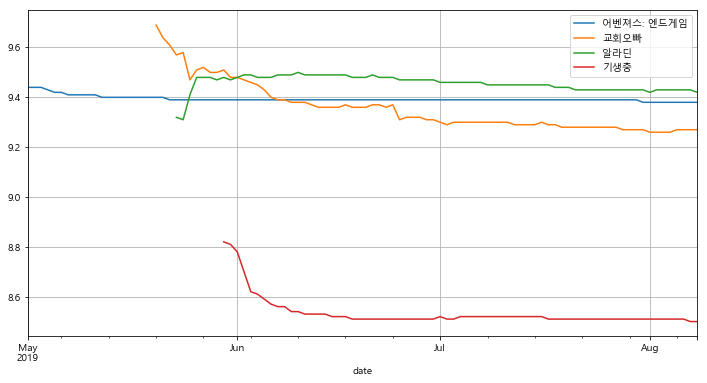

In [71]:
movie_pivot.plot(y=['어벤져스: 엔드게임', '교회오빠', '알라딘', '기생충'], figsize=(12,6))
plt.legend(loc='best')
plt.grid()
plt.show()

###### * 시간이 지남에 따라 선택한 영화의 평점 변화를 그래프로 확인할 수 있다.